In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Bar, Pie, Scatter, HeatMap

import warnings
warnings.filterwarnings('ignore')

In [376]:
df =pd.read_csv('szfj-price.csv')
df

,Unnamed: 0,district,roomnum,hall,AREA,C_floor,floor_num,school,subway,per_price
0,228757275,baoan,3,2,89.30,middle,31,0,0,7.0773
1,228757221,baoan,4,2,127.00,high,31,0,0,6.9291
2,228267986,baoan,1,1,28.00,low,39,0,0,3.9286
3,228879860,baoan,1,1,28.00,middle,30,0,0,3.3568
4,228521057,baoan,2,2,78.00,middle,8,1,1,5.0769
...,...,...,...,...,...,...,...,...,...,...
18509,228604127,yantian,1,0,29.90,middle,10,1,0,3.8796
18510,227865185,yantian,1,0,29.89,middle,8,1,0,4.0147
18511,227990827,yantian,1,0,28.86,high,8,0,0,5.0243
18512,226997909,yantian,1,1,26.29,high,18,1,0,4.9068


In [377]:
# 2.查看数据情况


# # 1) 数据总体情况
print('数据集中的样本量共有%d个' % df.shape[0])    # 查看数据量（行数）
print('-'*100)
print(df.duplicated())   # 判断是否有重复项
print('-'*100)
print(df.head())    # 查看前五行
print('-'*100)
print(df.describe(include='all').T)     # 查看描述基本信息
print('-'*100)
'''
数据无缺失、无重复
'''

数据集中的样本量共有18514个
----------------------------------------------------------------------------------------------------
0        False
1        False
2        False
3        False
4        False
         ...  
18509    False
18510    False
18511    False
18512    False
18513    False
Length: 18514, dtype: bool
----------------------------------------------------------------------------------------------------
   Unnamed: 0 district  roomnum  hall   AREA C_floor  floor_num  school  \
0   228757275    baoan        3     2   89.3  middle         31       0   
1   228757221    baoan        4     2  127.0    high         31       0   
2   228267986    baoan        1     1   28.0     low         39       0   
3   228879860    baoan        1     1   28.0  middle         30       0   
4   228521057    baoan        2     2   78.0  middle          8       1   

   subway  per_price  
0       0     7.0773  
1       0     6.9291  
2       0     3.9286  
3       0     3.3568  
4       1     5.0769  


'\n数据无缺失、无重复\n'

In [378]:
del df['Unnamed: 0']   # 删去之后不用的行
del df['floor_num']
df

,district,roomnum,hall,AREA,C_floor,school,subway,per_price
0,baoan,3,2,89.30,middle,0,0,7.0773
1,baoan,4,2,127.00,high,0,0,6.9291
2,baoan,1,1,28.00,low,0,0,3.9286
3,baoan,1,1,28.00,middle,0,0,3.3568
4,baoan,2,2,78.00,middle,1,1,5.0769
...,...,...,...,...,...,...,...,...
18509,yantian,1,0,29.90,middle,1,0,3.8796
18510,yantian,1,0,29.89,middle,1,0,4.0147
18511,yantian,1,0,28.86,high,0,0,5.0243
18512,yantian,1,1,26.29,high,1,0,4.9068


In [379]:
# # 2) 查看分类变量的取值

import sqlite3
con = sqlite3.connect(':memory:')
df.to_sql('df',con)
print(list(df))
print('查看分类变量的取值')
for i in list(df[['district','roomnum','hall','C_floor','school','subway']]):
    s = pd.read_sql_query('SELECT DISTINCT %s from df' % i,con)
    print(s)
    print('-'*12)
print('='*100)  # 划分割线，方便查看

['district', 'roomnum', 'hall', 'AREA', 'C_floor', 'school', 'subway', 'per_price']
查看分类变量的取值
      district
0        baoan
1  dapengxinqu
2       futian
3    guangming
4     longgang
5      longhua
6        luohu
7      nanshan
8     pingshan
9      yantian
------------
   roomnum
0        3
1        4
2        1
3        2
4        5
5        7
6        6
7        8
8        9
------------
   hall
0     2
1     1
2     0
3     3
4     4
5     5
6     6
------------
  C_floor
0  middle
1    high
2     low
------------
   school
0       0
1       1
------------
   subway
0       0
1       1
------------


In [380]:
# # 3) 将城区名由中文改成拼音，方便之后作图时查看
dist_dict = {'longgang':'龙岗','longhua':'龙华','baoan':'宝安','nanshan':'南山','futian':'福田','luohu':'罗湖','pingshan':'坪山','guangming':'光明','yantian':'盐田','dapengxinqu':'大鹏新区'}
df['district'] = df['district'].apply(lambda x:dist_dict[x])
print(df.head())
print('='*100)  # 划分割线，方便查看

  district  roomnum  hall   AREA C_floor  school  subway  per_price
0       宝安        3     2   89.3  middle       0       0     7.0773
1       宝安        4     2  127.0    high       0       0     6.9291
2       宝安        1     1   28.0     low       0       0     3.9286
3       宝安        1     1   28.0  middle       0       0     3.3568
4       宝安        2     2   78.0  middle       1       1     5.0769


In [381]:
# # 4) 生成一个excel表格用于分析列名含义
table_columns = pd.DataFrame(columns=['表名','表说明','列名','列名含义','备注'])
table_columns['列名'] = list(df)
table_columns.to_excel( r'\列名含义分析表（请另存）.xls')
print('列名含义分析表 已生成')
print('='*100)  # 划分割线，方便查看

列名含义分析表 已生成


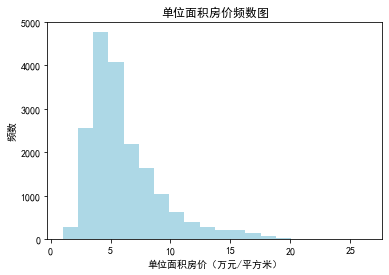

'\n通过直方图可发现数据是偏态分布的（右偏 → 那么之后可能会取对数）\n'

In [382]:
# --------------------------------【 目标拆解分析 】--------------------------------------

# (二) 因变量分析

# # 1. 单位面积房价分析

# # # 设置负号显示及字体
from matplotlib import pylab

pylab.rcParams['font.sans-serif'] = ['SimHei']
pylab.rcParams['axes.unicode_minus'] = False

# # # 1) 作因变量直方图
import matplotlib.pyplot as plt

df.per_price.hist(grid=False,bins=20,color='lightblue')
plt.title('单位面积房价频数图')
plt.xlabel('单位面积房价（万元/平方米）')
plt.ylabel('频数')
plt.show()
'''
通过直方图可发现数据是偏态分布的（右偏 → 那么之后可能会取对数）
'''

In [383]:
# # # 2) 查看 均值、中位数、标准差、四分位数
print(df.per_price.agg(['mean','median','std']))
print(df.per_price.quantile([0.25,0.5,0.75]))
print('='*100)
'''
价格的平均数mean： 6.118192
价格的中位数：5.246300
价格的标准差std：3.050218
四分位数情况：
    0.25    4.0526
    0.50    5.2463
    0.75    7.3574
'''

mean      6.118192
median    5.246300
std       3.050218
Name: per_price, dtype: float64
0.25    4.0526
0.50    5.2463
0.75    7.3574
Name: per_price, dtype: float64


'\n价格的平均数mean： 6.118192\n价格的中位数：5.246300\n价格的标准差std：3.050218\n四分位数情况：\n    0.25    4.0526\n    0.50    5.2463\n    0.75    7.3574\n'

In [384]:
# # # 3) 查看房价的 最大值 和 最小值
print('房价最大值为%s万元/㎡' % max(df.per_price))
print('房价最小值为%s万元/㎡' % min(df.per_price))
print('='*100)
'''
房价最大值为26.3968万元/㎡
房价最小值为1.0101万元/㎡
'''

房价最大值为26.3968万元/㎡
房价最小值为1.0101万元/㎡


'\n房价最大值为26.3968万元/㎡\n房价最小值为1.0101万元/㎡\n'

In [385]:
# (三) 自变量

# # 1. 整体来看
# # # 1) 分类变量 看 各个取值 的 数量统计 情况
for i in range(len(list(df))):
    if i != list(df).index('AREA') and i != list(df).index('per_price'):
        print(df.columns.values[i],':')
        print(df[df.columns.values[i]].value_counts())
        print('-'*100)
    else:
        continue
print('='*100)
'''
dist列中 每个区的样本量均在500以上;
roomnum列中 最多的类型是3房，6~9房的占比很少;
halls列中 最普遍的是2个;
floor列中 middle的数量多一些，high和low基本持平;
subway列中 基本持平;
school列中 学区房更多一些
'''

district :
罗湖      3299
坪山      2574
南山      2403
光明      2073
龙华      1950
盐田      1492
龙岗      1472
福田      1264
宝安      1251
大鹏新区     736
Name: district, dtype: int64
----------------------------------------------------------------------------------------------------
roomnum :
3    8320
2    4524
4    3037
1    1624
5     780
6     139
8      45
7      41
9       4
Name: roomnum, dtype: int64
----------------------------------------------------------------------------------------------------
hall :
2    14667
1     3268
0      287
3      220
4       64
6        5
5        3
Name: hall, dtype: int64
----------------------------------------------------------------------------------------------------
C_floor :
middle    7512
high      5707
low       5295
Name: C_floor, dtype: int64
----------------------------------------------------------------------------------------------------
school :
1    10876
0     7638
Name: school, dtype: int64
------------------------------------------------

'\ndist列中 每个区的样本量均在500以上;\nroomnum列中 最多的类型是3房，6~9房的占比很少;\nhalls列中 最普遍的是2个;\nfloor列中 middle的数量多一些，high和low基本持平;\nsubway列中 基本持平;\nschool列中 学区房更多一些\n'

In [386]:
# # # 2) 连续变量 看 最小、最大值、平均数、中位数、标准差
print('AREA:')
print(df.AREA.agg(['min','mean','median','max','std']).T)
print('='*100)
'''
AREA:
min        15.000000
mean       95.224924
median     88.000000
max       697.200000
std        48.570130
数据情况相对还是比较正常的
'''

AREA:
min        15.000000
mean       95.224924
median     88.000000
max       697.200000
std        48.570130
Name: AREA, dtype: float64


'\nAREA:\nmin        15.000000\nmean       95.224924\nmedian     88.000000\nmax       697.200000\nstd        48.570130\n数据情况相对还是比较正常的\n'

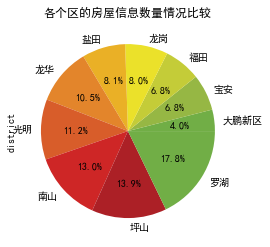

罗湖      3299
坪山      2574
南山      2403
光明      2073
龙华      1950
盐田      1492
龙岗      1472
福田      1264
宝安      1251
大鹏新区     736
Name: district, dtype: int64


In [387]:
# # 2. 分开各个量 → district列

# # # 各个区的房屋信息数量情况比较
colors = ['#71ae46','#96b744','#c4cc38','#ebe12a','#eab026','#e3852b','#d85d2a','#ce2626','#ac2026','#71ae46']
df.district.value_counts().sort_values().plot(kind='pie',autopct="%1.1f%%",colors=colors)
plt.title('各个区的房屋信息数量情况比较')
plt.show()
print(df.district.value_counts().sort_values(ascending=False))
print('='*100)

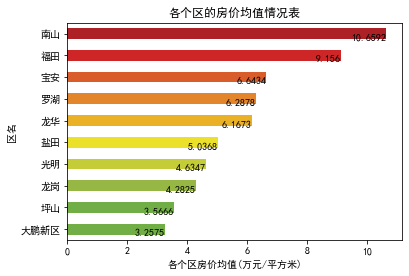

In [388]:
# # # 各个区房价均值比较
colors = ['#71ae46','#71ae46','#96b744','#c4cc38','#ebe12a','#eab026','#e3852b','#d85d2a','#ce2626','#ac2026']
df.per_price.groupby(df.district).mean().sort_values().plot(kind='barh',color=colors)
plt.xlabel('各个区房价均值(万元/平方米)')
plt.ylabel('区名')
plt.title('各个区的房价均值情况表')

A = df.per_price.groupby(df.district).mean().sort_values()
for i in range(len(list(df.district.value_counts()))): # 为图表加数字标签
    plt.text(A[i],i,round(A[i],4),fontsize=10,verticalalignment="top",horizontalalignment="right")  # round(A[i],4)保留四位小数
plt.show()

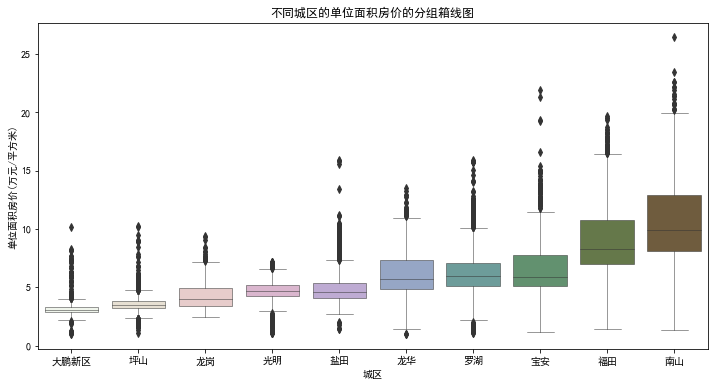

'\n由盒须图可知，随着x值的不同，中心水平是有变化的，故可初步判断二者是有关系的\n'

In [389]:
# # # 不同城区的单位面积房价（盒须图）
import seaborn as sns
df_temp1 = df[['district','per_price']].sort_values(by=['district'])
df_temp1['district'] = df_temp1['district'].astype('category')  # 标签排序
df_temp1['district'] = df_temp1['district'].cat.set_categories(['大鹏新区','坪山','龙岗','光明','盐田','龙华','罗湖','宝安','福田','南山'])
plt.figure(figsize=(12,6))  # 设置画布大小
sns.boxplot(x='district',y='per_price',data=df_temp1,linewidth=0.5,palette=sns.cubehelix_palette(16,start=2, rot=2, dark=0, light=.95))
plt.ylabel('单位面积房价(万元/平方米)')
plt.xlabel('城区')
plt.title('不同城区的单位面积房价的分组箱线图')
plt.show()
'''
由盒须图可知，随着x值的不同，中心水平是有变化的，故可初步判断二者是有关系的
'''


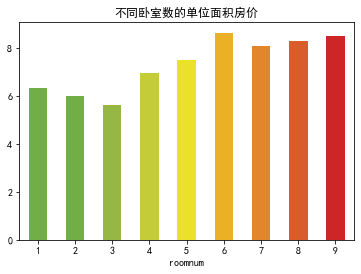

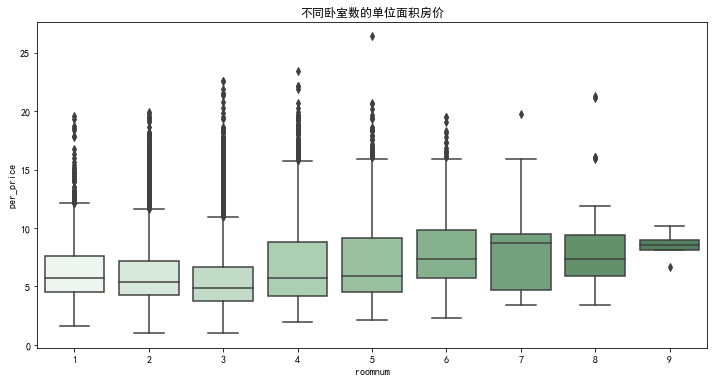

In [390]:
# # 3. 分开各个量 → roomnum列

# # # 不同卧室数的单位面积房价
df.per_price.groupby(df.roomnum).mean().plot(kind='bar',color=colors)
plt.xticks(rotation=360)
plt.title('不同卧室数的单位面积房价')
plt.show()

df_temp2 = df[['roomnum','per_price']]
# df_temp2.boxplot(by='roomnum',patch_artist=True)   # patch_artist上下四分位框内是否填充,True为填充
plt.figure(figsize=(12,6))
sns.boxplot(x=df_temp2['roomnum'],y=df_temp2['per_price'],palette=sns.cubehelix_palette(16,start=2, rot=0, dark=0, light=.95))
plt.title('不同卧室数的单位面积房价')
plt.show()

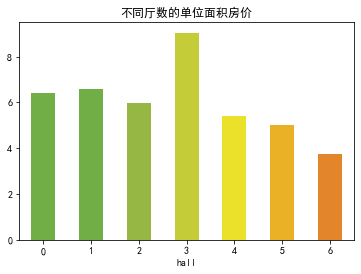

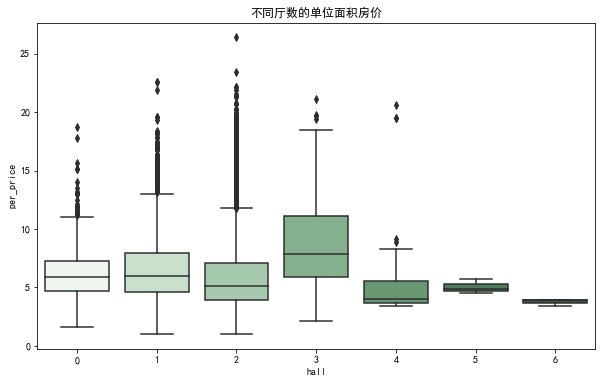

In [391]:
# # 4. 分开各个量 → hall列

# # # 不同厅数的单位面积房价
df.per_price.groupby(df.hall).mean().plot(kind='bar',color=colors)
plt.xticks(rotation=360)
plt.title('不同厅数的单位面积房价')
plt.show()


df_temp3 = df[['hall','per_price']]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_temp3['hall'],y=df_temp3['per_price'],palette=sns.cubehelix_palette(10,start=2, rot=0, dark=0, light=.95))
plt.title('不同厅数的单位面积房价')
plt.show()

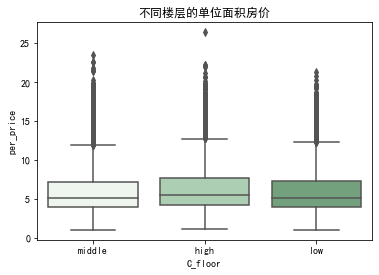

'\n不同卧室数的单位面积房价差异不大;\n不同厅数的单位面积房价有一定影响;\n不同楼层的单位面积房价差异不明显\n'

In [392]:
# # 5. 分开各个量 → C_floor列

df_temp4 = df[['C_floor','per_price']]
sns.boxplot(x=df['C_floor'],y=df_temp4['per_price'],palette=sns.cubehelix_palette(6,start=2, rot=0, dark=0, light=.95))
plt.title('不同楼层的单位面积房价')
plt.show()
'''
不同卧室数的单位面积房价差异不大;
不同厅数的单位面积房价有一定影响;
不同楼层的单位面积房价差异不明显
'''

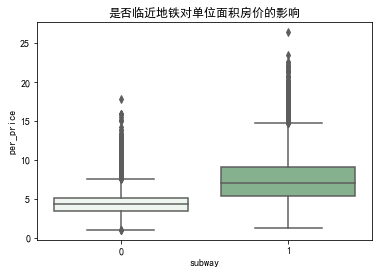

In [393]:
# 6.分开各个量 → subway

# # # 是否临近地铁对单位面积房价的影响
df_temp5 = df[['subway','per_price']]
sns.boxplot(x=df_temp5['subway'],y=df_temp5['per_price'],palette=sns.cubehelix_palette(4,start=2, rot=0, dark=0, light=.95))
plt.title('是否临近地铁对单位面积房价的影响')
plt.show()

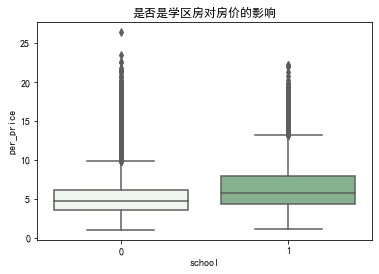

In [394]:
# # 7.分开各个量 → school

# # # 是否是学区房对房价的影响

df_temp6 = df[['school','per_price']]
sns.boxplot(x=df_temp6['school'],y=df_temp6['per_price'],palette=sns.cubehelix_palette(4,start=2,rot=0,dark=0,light=.95))
plt.title('是否是学区房对房价的影响')
plt.show()

In [395]:
def stack2dim(raw, i, j, rotation=0, location='upper left'):
    '''
    此函数是为了画两个维度标准化的堆积柱状图
    要求是目标变量j是二分类的
    raw为pandas的DataFrame数据框
    i、j为两个分类变量的变量名称，要求带引号，比如"school"
    rotation：水平标签旋转角度，默认水平方向，如标签过长，可设置一定角度，比如设置rotation = 40
    location：分类标签的位置，如果被主体图形挡住，可更改为'upper left'

    '''
    import math
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)  # 交叉表转换成比率，为得到标准化堆积柱状图

    # 计算x坐标，及bar宽度
    createVar = locals()
    x = [0]  # 每个bar的中心x轴坐标
    width = []  # bar的宽度
    k = 0
    for n in range(len(data)):
        # 根据频数计算每一列bar的宽度
        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)

            # 以下是通过频率交叉表矩阵生成一列对应堆积图每一块位置数据的数组，再把数组转化为矩阵
    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat)  # bar图中的y变量矩阵，每一行是一个y变量

    # 通过x，y_mat中的每一行y，依次绘制每一块堆积图中的每一块图
    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
    group_labels = [data.index.name + ': ' + str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation=rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()

In [396]:
# # # subway+school 地铁 + 学区
print(pd.crosstab(df.subway,df.school))
sub_shc = pd.crosstab(df.subway,df.school)
sub_shc = sub_shc.div(sub_shc.sum(1),axis=0)
print(sub_shc)
print('='*100)

school     0     1
subway            
0       4877  4303
1       2761  6573
school         0         1
subway                    
0       0.531264  0.468736
1       0.295800  0.704200


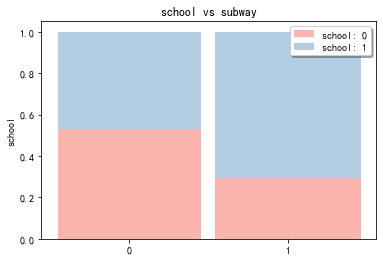

'\n是否临近地铁和是否时学区房对房价有一定影响；\n地铁房中的学区房比重 比 非地铁房中的学区比重更大\n'

In [397]:
# # # subway+school 的 两维度分组堆积图
from stack2dim import *
stack2dim(df,i='subway',j='school')

'''
是否临近地铁和是否时学区房对房价有一定影响；
地铁房中的学区房比重 比 非地铁房中的学区比重更大
'''

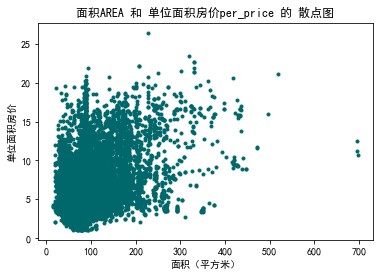

In [398]:
# # 8.面积 AREA x,y均为连续变量，画散点图

df_temp7 = df[['AREA','per_price']]
plt.scatter(df_temp7.AREA,df_temp7.per_price,marker='.',color='#00686b')
plt.title('面积AREA 和 单位面积房价per_price 的 散点图')
plt.ylabel("单位面积房价")
plt.xlabel("面积（平方米）")
plt.show()

In [399]:
# # # 求AREA和per_price的相关关系矩阵
import numpy as np

df_temp_A = np.array(df_temp7['per_price'])
df_temp_B = np.array(df_temp7['AREA'])
df_temp_AB = np.array([df_temp_A,df_temp_B])
print(np.corrcoef(df_temp_AB))
print('-'*50)
'''
1. 从散点图可看出，点由左向右逐渐稀疏，考虑对y取对数后再作散点图
'''

[[1.         0.31332208]
 [0.31332208 1.        ]]
--------------------------------------------------


'\n1. 从散点图可看出，点由左向右逐渐稀疏，考虑对y取对数后再作散点图\n'

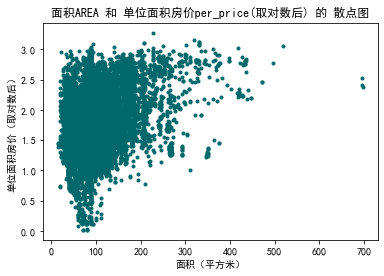

In [400]:
# # # 面积AREA 和 单位面积房价per_price(取对数后) 的 散点图
A = df_temp7.copy()
# A.loc[:,'per_price_ln'] = A.loc[:,'per_price'].apply(lambda x:np.log(x))
A['per_price_ln'] = A['per_price'].apply(lambda x:np.log(x))
plt.scatter(A.AREA,A.per_price_ln,marker='.',color='#00686b')
plt.title('面积AREA 和 单位面积房价per_price(取对数后) 的 散点图')
plt.ylabel("单位面积房价（取对数后）")
plt.xlabel("面积（平方米）")
plt.show()

In [401]:
df_temp_C = np.array(A['per_price_ln'])
df_temp_D = np.array(A['AREA'])
df_temp_CD = np.array([df_temp_C,df_temp_D])
print(np.corrcoef(df_temp_CD))
print('-'*50)
'''
依然呈现明显的右边集中特点，考虑对x变量也取对数
'''

[[1.         0.26030901]
 [0.26030901 1.        ]]
--------------------------------------------------


'\n依然呈现明显的右边集中特点，考虑对x变量也取对数\n'

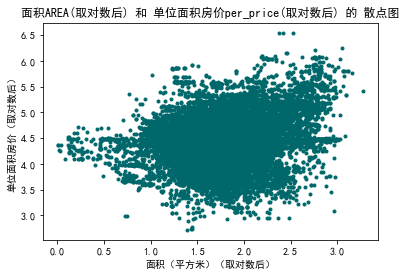

In [402]:
# # # 面积AREA(取对数后) 和 单位面积房价per_price(取对数后) 的 散点图
B = df_temp7.copy()
B['per_price_ln'] = np.log(B['per_price'])
B['AREA_ln'] = np.log(B['AREA'])
plt.scatter(B.per_price_ln,B.AREA_ln,marker='.',color='#00686b')
plt.title('面积AREA(取对数后) 和 单位面积房价per_price(取对数后) 的 散点图')
plt.ylabel("单位面积房价（取对数后）")
plt.xlabel("面积（平方米）（取对数后）")
plt.show()

In [403]:
# # # AREA_ln 和 per_price_ln 的相关系数矩阵
df_temp_E = np.array(B['per_price_ln'])
df_temp_F = np.array(B['AREA_ln'])
df_temp_EF = np.array([df_temp_E,df_temp_F])
print(np.corrcoef(df_temp_EF))
print('-'*50)
'''
 两者都取对数后，分布正态了，故之后建模时，应该二者都取对数
 '''

[[1.         0.18715179]
 [0.18715179 1.        ]]
--------------------------------------------------


'\n 两者都取对数后，分布正态了，故之后建模时，应该二者都取对数\n '

In [404]:
df

,district,roomnum,hall,AREA,C_floor,school,subway,per_price
0,宝安,3,2,89.30,middle,0,0,7.0773
1,宝安,4,2,127.00,high,0,0,6.9291
2,宝安,1,1,28.00,low,0,0,3.9286
3,宝安,1,1,28.00,middle,0,0,3.3568
4,宝安,2,2,78.00,middle,1,1,5.0769
...,...,...,...,...,...,...,...,...
18509,盐田,1,0,29.90,middle,1,0,3.8796
18510,盐田,1,0,29.89,middle,1,0,4.0147
18511,盐田,1,0,28.86,high,0,0,5.0243
18512,盐田,1,1,26.29,high,1,0,4.9068


In [405]:
#python实现
from sklearn.preprocessing import OneHotEncoder
class_mapping = {'南山':0,'宝安':1,'大鹏新区':2,'光明':3,'龙岗':4,'罗湖':5,'龙华':6,'坪山':7,'盐田':8,'福田':9}

df['district'] = df['district'].map(class_mapping)

In [406]:
c_mapping = {'low':0,'middle':1,'high':2}
df['C_floor'] = df['C_floor'].map(c_mapping)

In [407]:
df

,district,roomnum,hall,AREA,C_floor,school,subway,per_price
0,1,3,2,89.30,1,0,0,7.0773
1,1,4,2,127.00,2,0,0,6.9291
2,1,1,1,28.00,0,0,0,3.9286
3,1,1,1,28.00,1,0,0,3.3568
4,1,2,2,78.00,1,1,1,5.0769
...,...,...,...,...,...,...,...,...
18509,8,1,0,29.90,1,1,0,3.8796
18510,8,1,0,29.89,1,1,0,4.0147
18511,8,1,0,28.86,2,0,0,5.0243
18512,8,1,1,26.29,2,1,0,4.9068


In [408]:
# 获取特征
x = df[['district','C_floor','roomnum','hall','AREA','school','subway']]
print(x.shape)

(18514, 7)


In [409]:
y = df['per_price']
print(y.shape)

(18514,)


In [435]:
#先将数据集分成训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [436]:
# 建立模型 
from sklearn import metrics
from pickle import dump
#交叉验证
from sklearn.model_selection import cross_val_score
#随机森林 
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=30,max_features=None)
# df_rfc = cross_val_score(model,x,y,,cv=10) #交叉验证
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.9441332324639324

In [438]:
# 保存模型
model_file='finalized_model(0.9428).pkl'
with open(model_file,'wb') as model_f:
    dump(model,model_f)

In [439]:
from pickle import load
# 加载模型测试测试集准确率
with open(model_file,'rb') as model_f:
    loaded_model=load(model_f)
    result=loaded_model.score(X_test,y_test)
    print(result)

0.7410807855312107
